(5250, 5250)
(27562500,)
-0.0010754982 -1.2452178e-06 0.004314123056828961 14.744983
(10963990,)
(10854350,)


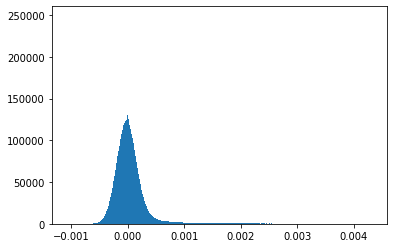

In [4]:
import numpy as np
from astropy.io import fits



# --- open the image and simply quote the size (in pixels)

image_dir = '../../data/original' # image directory relative to this script
#Could ask to input the filter ID?
#f = input('Filter ID')
f = 'f435w' # filter ID

sci = fits.getdata(f'{image_dir}/{f}_sci.fits') # read FITS file data
print(sci.shape) # return the shape of the image


# --- plot a histogram of the pixel values

import matplotlib.pyplot as plt

pix = sci.flatten() # flatten image to produce a list of pixels

print(pix.shape)

pix = pix[pix!=0.0] # exclude pixels which are exactly 0.0; these are likely bits of the image which have not been observed.

print(np.min(pix), np.median(pix), np.percentile(pix, 99), np.max(pix)) # print min, median, 99th percentile, and max.

print(pix.shape)

# NOTE: some pixels are erroneously high, keeping them would screw up any histograme

p99 = np.percentile(pix, 99) # determine 99th percentil of pixel distribution.

pix = pix[pix<p99]

print(pix.shape)

plt.hist(pix, bins = 1000)
plt.show()